In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
file = pd.ExcelFile("Data_Fig1.xlsx")
df = pd.read_excel(file, sheet_name="fig_1b")
df.head() 

,nhp_id,va_mnav,vp_mnav,Unnamed: 3,nhp_id.1,va_mnav.1,vp_mnav.1
0,a,-0.65,-0.416667,NaN,m,2.60,1.483333
1,a,-0.65,-0.550000,NaN,m,0.65,0.783333
2,a,-1.95,-1.366666,NaN,m,2.60,2.233334
3,a,-1.95,-1.383333,NaN,m,1.95,2.416644
4,a,-1.95,-0.550000,NaN,m,0.65,0.833333


In [3]:
# Left block: Amadeus
a = df[['nhp_id', 'va_mnav', 'vp_mnav']]
# Right block: Mahler 
m = df[['nhp_id.1', 'va_mnav.1', 'vp_mnav.1']].rename(columns={'nhp_id.1':'nhp_id', 'va_mnav.1':'va_mnav', 'vp_mnav.1':'vp_mnav' })

a = a.dropna()
m = m.dropna()

In [4]:
def plot_1b(df_monkey, title):
    X= df_monkey['va_mnav'].values.reshape(-1,1)
    y= df_monkey['vp_mnav'].values

    model = LinearRegression().fit(X,y)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Scatter
    plt.figure()
    plt.scatter(df_monkey['va_mnav'], df_monkey['vp_mnav'], s=10)

    xx = np.linspace(-5, 5, 100).reshape(-1, 1)
    yy = model.predict(xx)
    plt.plot(xx, yy)

    # Identity line (optional)
    plt.plot([-5, 5], [-5, 5], '--')

    plt.xlabel("Actual vector v_a (s)")
    plt.ylabel("Produced vector v_p (s)")
    plt.axis("square")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.title(f"{title}: v_p = {slope:.2f} * v_a + {intercept:.2f}")
    plt.show()

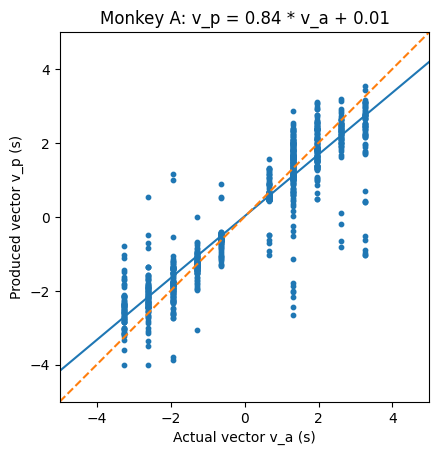

In [5]:
plot_1b(a, 'Monkey A')

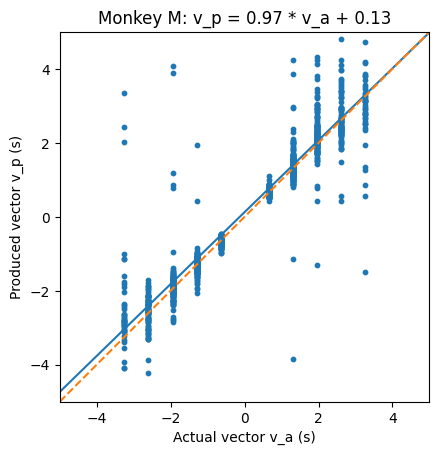

In [6]:
plot_1b(m, 'Monkey M')

In [7]:
def plot_monkey(df_monkey, title):
    X = df_monkey['va_mnav'].values.reshape(-1, 1)
    y = df_monkey['vp_mnav'].values

    # Fit linear model
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_

    # ----- FIGURE -----
    plt.figure(figsize=(5,5))

    # Scatter points (paper uses black filled circles)
    plt.scatter(df_monkey['va_mnav'], df_monkey['vp_mnav'],
                s=12, color='black', edgecolor='none', alpha=0.8)

    # Regression line 
    xx = np.linspace(-5, 5, 100).reshape(-1, 1)
    yy = model.predict(xx)
    plt.plot(xx, yy, color='red', linewidth=1)

    # Identity line (paper uses dashed black)
    plt.plot([-5, 5], [-5, 5], '--', color='black', linewidth=1)

    # Labels
    plt.xlabel("Actual vector v_a (s)", fontsize=13)
    plt.ylabel("Produced vector v_p (s)", fontsize=13)

    # Square axes
    plt.axis("square")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # Tick styling (paper-like)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Remove top + right spines (cleaner figure, similar to Nature style)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Title with formatted regression equation
    plt.title(f"{title}\n$v_p = {slope:.2f} \\, v_a + {intercept:.2f}$",
              fontsize=14, color='black', pad=12)

    plt.tight_layout()
    plt.show()


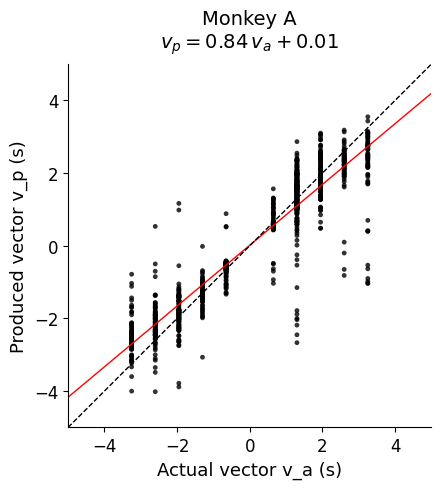

In [8]:
plot_monkey(a,'Monkey A')